**Note**:  This is a computable Jupyter notebook who's source code can be downloaded [here](https://raw.githubusercontent.com/johnfoster-pge-utexas/PGE383-AdvGeomechanics/master/files/assignment3_solution.ipynb).

# Problem 1

Consider the following equation which describes the transverse deflection associated with a simply supported beam subject to a uniform transverse load $q(x)=q_0$,

\begin{equation}
	\frac{{\rm d}^2}{{\rm d}x^2} \left[ EI \frac{{\rm d}^2 w(x)}{{\rm d}x^2} \right] = q_0 \quad \text{for} \quad 0 < x < L, \notag
\end{equation}
subject to boundary conditions,
\begin{equation}
	w(0) = EI \frac{{\rm d}^2 w(0)}{{\rm d}x^2} = 0, \quad \text{and} \quad w(L) = EI \frac{{\rm d}^2 w(L)}{{\rm d}x^2} = 0. \notag
\end{equation}


### (a) **10 points**  

Develop and clearly indicate the weak form of this differential equation.

**Solution**

To formulate the weak form of the differential equation, we start by writing the weighted integral statement. We move everything to one side of the equation, multiply through by a test function $\delta w(x)$, and itegrate over the domain of the problem.

$$
\int_0^L \delta w(x) \left( \frac{{\rm d}^2}{{\rm d}x^2} \left[ EI \frac{{\rm d}^2 w(x)}{{\rm d}x^2} \right] - q_0 \right) {\rm d}x = 0
$$

To proceed with the integration-by-parts step, we need to know the identity for forth-order derivatives, i.e.

\begin{align}
\int_a^b v \frac{{\rm d}^4 w}{{\rm d}x^4} {\rm d}x = \int_a^b \frac{{\rm d}^2 w}{{\rm d}x^2} \frac{{\rm d}^2 v}{{\rm d}x^2} {\rm d}x &+ \frac{{\rm d}^2 w(a)}{{\rm d}x^2} \frac{{\rm d}^2 v(a)}{{\rm d}x^2} - \frac{{\rm d}^2 w(b)}{{\rm d}x^2} \frac{{\rm d}^2 w(b)}{{\rm d}x^2} \\
&+ v(b) \frac{{\rm d}^3 w(b)}{{\rm d}x^3} - v(a) \frac{{\rm d}^2 w(a)}{{\rm d}x^2}
\end{align}

If we let $a=0$, $b=L$, and $v =\delta w(x)$ we can write the first term of the weighted integral statement then as

\begin{align}
EI \int_0^L \delta w(x) \frac{{\rm d}^4 w}{{\rm d}x^4} {\rm d}x &= EI\left[ \int_0^L \frac{{\rm d}^2 \delta w}{{\rm d}x^2} \frac{{\rm d}^2 w}{{\rm d}x^2} {\rm d}x + \frac{{\rm d}^2 \delta w(0)}{{\rm d}x^2} \frac{{\rm d}^2 w(0)}{{\rm d}x^2} - \frac{{\rm d}^2 \delta w(L)}{{\rm d}x^2} \frac{{\rm d}^2 w(L)}{{\rm d}x^2} \right. \\
& \left. + \, \delta w(L) \frac{{\rm d}^3 w(L)}{{\rm d}x^3} - \delta w(0) \frac{{\rm d}^2 w(0)}{{\rm d}x^2} \right]
\end{align}

after we apply the boundary conditions all but the first term on the right-hand side drop out, leaving

$$
EI \int_0^L \delta w(x) \frac{{\rm d}^4 w}{{\rm d}x^4} {\rm d}x = EI \int_0^L \frac{{\rm d}^2 \delta w}{{\rm d}x^2} \frac{{\rm d}^2 w}{{\rm d}x^2} {\rm d}x
$$

plugging this into the wieghted integral statement gives us the weak form of the differential equation:

$$
\int_0^L EI \frac{{\rm d}^2 \delta w}{{\rm d}x^2} \frac{{\rm d}^2 w}{{\rm d}x^2} - \delta w(x) q_0 {\rm d}x
$$



### (b) **5 points**

Using the following approximation for $u$,

\begin{equation}
	u \approx u_h = c_1 x \left ( x - L \right ), \notag
\end{equation}

use the Ritz method to determine the coefficient $c_1$.

**Solution**

Here our interpolating function is $\phi(x)=x(x-L)$ and in the Ritz method we use $\delta w(x) = \phi(x)$ and $w(x) = c_1 x(x-L)$.  Plugging these into the weak form and evaluating the integral we have

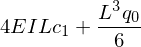

In [1]:
from sympy import *
init_printing()

x, c1, L, q0, EI = symbols('x, c_1, L, q_0, EI')

phi1 = x * (x - L)

expr1 = integrate(EI * diff(c1 * phi1, x, 2) * diff(phi1, x, 2) 
                  - phi1 * q0, (x, 0, L)); expr1

Now solve for $c_1$

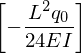

In [2]:
c1_sol1 = solve(Eq(expr1, 0), c1); c1_sol1

### (c) **5 points**

Using the following approximation for $u$,

\begin{equation}
	u \approx u_h = c_1 \sin \left( \frac{ \pi x}{L} \right) \notag
\end{equation}

use the Ritz method to determine the coefficient $c_1$.

Here our interpolating function is $\phi(x)=\sin\left(\frac{\pi x}{L}\right)$ and in the Ritz method we use $\delta w(x) = \phi(x)$ and $w(x) = c_1 \sin\left(\frac{\pi x}{L}\right)$.  Plugging these into the weak form and evaluating the integral we have:

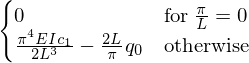

In [3]:
phi2 = sin(pi * x / L)

expr2 = integrate(EI * diff(c1 * phi2, x, 2) * diff(phi2, x, 2) 
                  - phi2 * q0, (x, 0, L)); expr2.simplify()

Since $\pi$ and $L$ are both positive constants we can ignore the first case above.

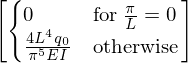

In [4]:
c1_sol2 = solve(Eq(expr2, 0), c1); c1_sol2

### (d) **5 points**

Compare your answers from (b) and (c) with the analytic solution at $x=L/2$.  Which is more accurate?  Why?  (Hint:  It has something to do with the boundary conditions.)

**Solution**

First let's solve the problem analytically

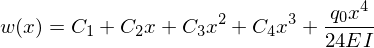

In [5]:
w = Function('w')
dsolve(Eq(Derivative(EI * Derivative(w(x), x, x), x, x), q0), w(x))

Using the boundary conidtions to determin the unknown $C_i$'s

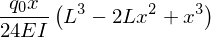

In [6]:
c2, c3, c4 = symbols('c_2, c_3, c_4')
sol = c1 + c2 * x + c3 * x * x + c4 * x * x * x + q0 * x * x * x * x / 24 / EI
eqn1 = Eq(EI * sol.diff(x,2).subs(x, 0), 0)
eqn2 = Eq(EI * sol.diff(x,2).subs(x, L), 0)
eqn3 = Eq(sol.subs(x, 0), 0)
eqn4 = Eq(sol.subs(x, L), 0)
final = solve([eqn1, eqn2, eqn3, eqn4], [c1, c2, c3, c4])
w_exact = sol.subs(c1, final[c1]).subs(c2, final[c2]).subs(c3, final[c3]).subs(c4, final[c4]).simplify()
w_exact

Now we will evaluate the exact solution at $L/2$ and and compare to the approximate solutions evaulated at the same location.

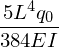

In [7]:
we_L2 = w_exact.subs(x, L/2); we_L2

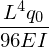

In [8]:
sol1_L2 = (c1_sol1[0] * phi1).subs(x, L / 2).simplify(); sol1_L2

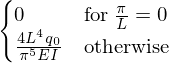

In [9]:
sol2_L2 = (c1_sol2[0] * phi2).subs(x, L / 2).simplify(); sol2_L2

Noticing that all solutions have the same $\frac{L^4 q_0}{EI}$ term, we will compare only the scale factor out front.  For the exact solution we have

In [10]:
5 / 384.

For the first approximate solutions we have

In [11]:
1 / 96.

For the second approximate solution we have

In [12]:
pi = 4 * atan(1.0);
4 / pi ** 5

The second approximation is better than the first.  This is because $\phi=\sin\left(\frac{\pi x}{L}\right)$ satisfys both the essential and natural boundary conditions whereas $\phi=x(x-L)$ only satisfies the essential boundary conditions.  Satisfying the natural bondary conditions is not a requirement of $\phi$, but will yield better approximations with fewer terms.

# Problem 2

We have seen that the following one-dimensional boundary value problem describes the physics of many interesting problems in engineering

\begin{equation}
	-\frac{d}{dx} \left[ a \frac{du}{dx} \right] + c u - f = 0 \quad \text{for} \quad 0 < x < L, \notag
\end{equation}

subject to the boundary conditions

\begin{equation}
	u(0) = u_0 \quad \text{and} \quad \left[ a \frac{du}{dx} \right]_{x=L} = Q_0, \notag
\end{equation}

where the $x$ is the independent variable, $u=u(x)$ is the dependent variable, and $a =  a(x), c = c(x), f=f(x), u_0$, and $Q_0$ are the *data* of the problem.
	

### (a) 30 points

Write a general one-dimensional finite element code to solve this problem.  General means that the user will input the *node* locations and specify the functions $a(x)$, $c(x)$, and $f(x)$ as well as the boundary conditions $u_0$ and $Q_0$.  The output of the code should be the value of $u$ at the user specified nodes.  You can restrict the code to using only linear interpolated elements.

You can verify your code with following data and results:


1. For $a(x) = 1 - x/2$, $c(x) = 0$, $f(x) = 0$, $u_0 = 0$, and $Q_0 = 1$,	

|$x$|$u(x)$|
|-|-|
|0.00|0.00000|
|0.25|0.26666|
|0.50|0.57435|
|0.75|0.93799|
|1.00|1.38244|

2. For $a(x) = 1 - x/2$, $c(x) = x$, $f(x) = x$, $u_0 = 0$, and $Q_0 = 1$,
	
|$x$|$u(x)$|
|-|-|
|0.00|0.00000|
|0.40|0.46695|
|0.60|0.73242|
|0.65|0.80319|
|0.70|0.87615|
|1.00|1.38355|


3. For $a(x) = 1$, $c(x) = 0$, $f(x) = x^2$, $u_0 = 0$, and $Q_0 = 2$,
	
|$x$|$u(x)$|
|-|-|
|1|0.000|
|2|22.08| 
|3|40.00|
|4|48.75|





**Solution**

First we will write a general class that solves an arbitrary one-dimensional problem.

In [13]:
import numpy as np
import scipy.linalg

class OneDimFEA():
    
    def __init__(self, nodes, a=lambda x: 1, c=lambda x: 0, f=lambda x: 0, u0=0, Q0=1):
        """
           Initiates an object from the argument list to perform FEA solution on the following
           
               -\frac{d}{dx} \left[ a \frac{du}{dx} \right] + c u - f = 0 \\
               
               \text{for} \quad 0 < x < L, \\
               
               \text{with} u(0) = u_0 \quad \\
               
               \text{and} \quad \left[ a \frac{du}{dx} \right]_{x=L} = Q_0
           
           
           assigns the following default properties if none are given in the argument list
           
           input: nodes - list of node locations, ex. [0, 1.2, 4.7, 8]
           input (optional): a - function of x (default = 1)
           input (optional): c - function of x (default = 0)
           input (optional): f - function of x (default = 0)
           input (optional): u0 - essential boundary conditional at x = 0 (default = 0)
           input (optional): Q0 - natural boundary condition at x = L (default = 1)
           
           output: u at the node locations
        """
        
        self.nodes = np.array(nodes, dtype=np.double)
        self.a = a
        self.c = c
        self.f = f
        self.u0 = u0
        self.Q0 = Q0
        
        self.K = np.zeros((len(self.nodes), len(self.nodes)))
        self.F = np.zeros(len(self.nodes))
        
    def N1(self, x):
        """Computes the first linear shape function"""
        nodes = self.nodes
        return (x - nodes[1:]) / (nodes[:-1] - nodes[1:])
    
    def N2(self, x):
        """Computes the second linear shape function"""
        nodes = self.nodes
        return (nodes[:-1] - x) / (nodes[:-1] - nodes[1:])
    
    def dN1dx(self, x):
        """Computes the derivative of the first linear shape function"""
        nodes = self.nodes
        return 1 / (nodes[:-1] - nodes[1:])
    
    def dN2dx(self, x):
        """Computes the derivative of the second linear shape function"""
        nodes = self.nodes
        return 1 / (nodes[1:] - nodes[:-1])
    
    def compute_element_stiffness_and_force(self):
        """
           Computes the components of the element stiffness matrix and
           element nodal forces for all elements
        """
        
        nodes = self.nodes
        
        #We will use Gauss integration at the following points
        t1 =  np.sqrt(1.0 / 3.0)
        t2 = -np.sqrt(1.0 / 3.0)
        
        #Because the points above are defined on the domain -1 < x < 1 and our
        #elements are defined on arbitrary domains, we can use a change of variables
        #to rescale the integration bounds
        x1 = ((nodes[1:] - nodes[:-1]) * t1 + nodes[1:] + nodes[:-1]) / 2.0
        x2 = ((nodes[1:] - nodes[:-1]) * t2 + nodes[1:] + nodes[:-1]) / 2.0
        
        #Evaluating the shape functions and thier derivatives at each Gauss 
        #integration point.
        N1x1 = self.N1(x1)
        N2x1 = self.N2(x1)
        dN1dx1 = self.dN1dx(x1)
        dN2dx1 = self.dN2dx(x1)
        
        N1x2 = self.N1(x2)
        N2x2 = self.N2(x2)
        dN1dx2 = self.dN1dx(x2)
        dN2dx2 = self.dN2dx(x2)
        
        #Same for the functions
        a1 = self.a(x1)
        a2 = self.a(x2)
        c1 = self.c(x1)
        c2 = self.c(x2)
        f1 = self.f(x1)
        f2 = self.f(x2)
        
        #Now we evaluate the element stiffness matrix components, the 0.5*(b-a) term out front
        #is due to the change of variables
        self.k11 = (nodes[1:] - nodes[:-1]) / 2 * (a1 * dN1dx1 * dN1dx1 + a2 * dN1dx2 * dN1dx2 + 
                                                   c1 * N1x1 * N1x1 + c2 * N1x2 * N1x2)
        self.k12 = (nodes[1:] - nodes[:-1]) / 2 * (a1 * dN1dx1 * dN2dx1 + a2 * dN1dx2 * dN2dx2 + 
                                                   c1 * N1x1 * N2x1 + c2 * N1x2 * N2x2)
        self.k21 = (nodes[1:] - nodes[:-1]) / 2 * (a1 * dN2dx1 * dN1dx1 + a2 * dN2dx2 * dN1dx2 + 
                                                   c1 * N2x1 * N1x1 + c2 * N2x2 * N1x2)
        self.k22 = (nodes[1:] - nodes[:-1]) / 2 * (a1 * dN2dx1 * dN2dx1 + a2 * dN2dx2 * dN2dx2 + 
                                                   c1 * N2x1 * N2x1 + c2 * N2x2 * N2x2)
        #Same for the element force vector components
        self.fe1 =  (nodes[1:] - nodes[:-1]) / 2 * (f1 * N1x1 + f2 * N1x2)
        self.fe2 =  (nodes[1:] - nodes[:-1]) / 2 * (f1 * N2x1 + f2 * N2x2)
        
        
    def assemble(self):
        """
           Assembles the global stiffness matrix and force vector
        """
        self.K += np.diag(np.r_[self.k11, 0.0])
        self.K += np.diag(np.r_[0.0, self.k22])
        self.K += np.diag(self.k12, k=1)
        self.K += np.diag(self.k21, k=-1)
        
        self.F[:-1] += self.fe1
        self.F[1:]  += self.fe2
        
        
    def apply_bcs(self):
        """
           Applies essential and natural boundary conditions
        """
        
        row = np.zeros(len(self.nodes))
        row[0] = 1.0
        
        self.K[0] = row
        self.F[0] = self.u0
        
        self.F[-1] += self.Q0
        
        
    def solve(self):
        """
           Solves the one-dimensional finite element problem.
        """
        self.compute_element_stiffness_and_force()
        self.assemble()
        self.apply_bcs()
        
        return scipy.linalg.solve(self.K, self.F)

Now we can solve the three verification problems above to test the code.

In [14]:
nodes1 = [0.0, 0.25, 0.50, 0.75, 1.00]
problem1 = OneDimFEA(nodes1, a=lambda x: 1 - x / 2)
problem1.solve()

array([ -3.55271368e-16,   2.66666667e-01,   5.74358974e-01,
         9.37995338e-01,   1.38243978e+00])

In [15]:
nodes2 = [0.0, 0.40, 0.60, 0.65, 0.70, 1.00]
problem2 = OneDimFEA(nodes2, a=lambda x: 1 - x / 2, c=lambda x: x, f=lambda x: x)
problem2.solve()

array([ -5.95648717e-16,   4.66641976e-01,   7.31924142e-01,
         8.02638676e-01,   8.75540741e-01,   1.38162220e+00])

In [16]:
nodes3 = [1, 2, 3, 4]
problem3 = OneDimFEA(nodes3, a=lambda x: 1 , f=lambda x: x ** 2, Q0=2)
problem3.solve()

array([  0.        ,  22.08333333,  40.        ,  48.75      ])

## (b) 20 points

A one-dimensional heterogenuous porous medium of length $L=1$ m, has a steady state pressure distribution as shown in the following table.  

|$x$ (m)|$p(x)$ ($\times$ kPa)|
|---|------|
|0.00|100.0|
|0.05|100.005|
|0.10|100.010|
|0.15|100.014|
|0.20|100.018|
|0.25|100.021|
|0.30|100.024|
|0.35|100.026|
|0.40|100.029|
|0.45|100.030|
|0.50|100.032|
|0.55|100.033|
|0.60|100.034|
|0.65|100.035|
|0.70|100.036|
|0.75|100.037|
|0.80|100.038|
|0.85|100.038|
|0.90|100.039|
|0.95|100.040|
|1.00|100.040|


The porous media is subject to the a constant pressure a $x=0$ of $p = 100$ kPa and an exit flow rate of $Q = 100$ m/s is measured. 

Use the code developed in part (a) to help you estimate what the permiablity $\kappa(x)$ this material.  You can use a consant viscosity of $\mu = 1$ Pa$\cdot$s. Clearly indicate your answer and explain your approach (preferably with plots).  The total diffusivity coefficient is $K = \frac{\kappa}{\mu}$.

**Note:**  Submit a working version of your code to [Canvas](https://utexas.instructure.com/courses/1119539).  Any supplemental material explaining your answer in part (b) can be turned in to me via hard copy or scanned and submitted to Canvas with your code.

**Solution**

Below we define our objective function which is to minimize the $L_2$-norm of the difference between the pressure output by our FE code and the known pressure published above at the node ($x$) location.

In [17]:
def objective_fun(c, nodes, p):
    """
       Computes the objective function for minimization.
       
       input: c - the initial guess for the optimization routine, i.e. the coefficients
                  of the polynomial which is of quadratic form
       input: nodes - the nodal locations, needed for the FE code
       input: p - the known pressures
       
       output: the scalar output to minimize
    """
 
    
    problem = OneDimFEA(nodes, 
                        a=lambda x: c[0] + c[1] * x + c[2] * x ** 2, 
                        u0=100000, 
                        Q0=100)
    
    sol = problem.solve().flatten()
    
    return np.linalg.norm(sol - p)

In [18]:
import scipy.optimize

#Create the nodal array and define the known pressures from the problem statement
nodes = np.linspace(0,1,num=21)
p = np.array([100.000, 100.005, 100.010, 100.014, 100.018, 100.021, 100.024, 100.026, 
              100.029, 100.030, 100.032, 100.033, 100.034, 100.035, 100.036, 
              100.037, 100.038 ,100.038, 100.039, 100.040, 100.040], dtype=np.double) * 1000

#Run the optimization routine
res = scipy.optimize.minimize(objective_fun, [1,1,1],args=(nodes,p), method='Nelder-Mead');
#Extract the solution
c = res.x
print(res)

     fun: 1.1269859125646242
 success: True
     nit: 145
    nfev: 257
 message: 'Optimization terminated successfully.'
  status: 0
       x: array([ 0.95633747,  0.57572211,  8.93686525])


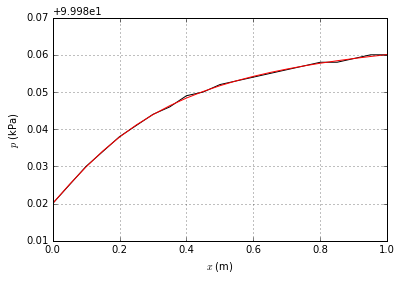

In [19]:
#Plot the results
%matplotlib inline
import matplotlib.pyplot as plt

problem = OneDimFEA(nodes, 
                    a=lambda x: c[0] + c[1] * x + c[2] * x ** 2, 
                    u0=100000, 
                    Q0=100)
    
sol = problem.solve().flatten()

plt.plot(nodes, p / 1000, 'k-', nodes, sol / 1000, 'r-');
plt.xlabel('$x$ (m)')
plt.ylabel('$p$ (kPa)')
plt.grid()

The fit looks pretty good, so an acceptable answer is:

$$
\kappa(x) = 0.96 + 0.58 x + 8.94 x^2
$$